In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_paths = ['./logger_100.csv', './logger_1000.csv', './logger_1e4.csv', './logger_1e5.csv']

In [3]:
dfs = [pd.read_csv(f) for f in csv_paths]

In [4]:
[df.shape for df in dfs]

[(20, 3), (20, 3), (20, 3), (20, 3)]

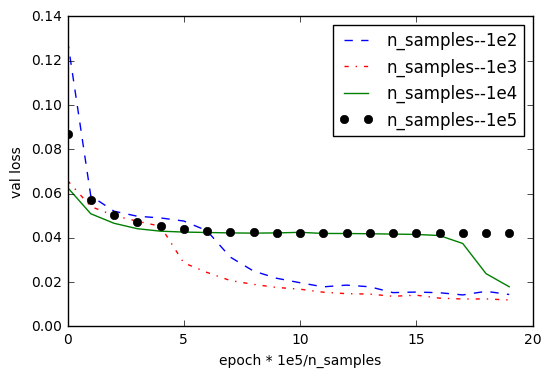

In [22]:
plt.plot(dfs[0].epoch, dfs[0].val_loss, '--', label='n_samples--1e2', c='b')
plt.plot(dfs[1].epoch, dfs[1].val_loss, '-.', label='n_samples--1e3', c='r')
plt.plot(dfs[2].epoch, dfs[2].val_loss, '-', label='n_samples--1e4', c='g')
plt.plot(dfs[3].epoch, dfs[3].val_loss, 'o', label='n_samples--1e5', c='k')
plt.xlabel('epoch * 1e5/n_samples')
plt.ylabel('val loss')
plt.legend()
plt.show()

In [10]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi